### Dataset : Customer Churn Dataset

### Start by importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Personal notebooks/Datasets/customer_churn_dataset-training-master.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Personal notebooks/Datasets/customer_churn_dataset-testing-master.csv')

In [ ]:
train_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


Churm =1 means , customer is going to discontinue with the service and vice-versa otherwise

In [ ]:
test_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [ ]:
train_df.shape

(440833, 12)

In [ ]:
test_df.shape

(64374, 12)

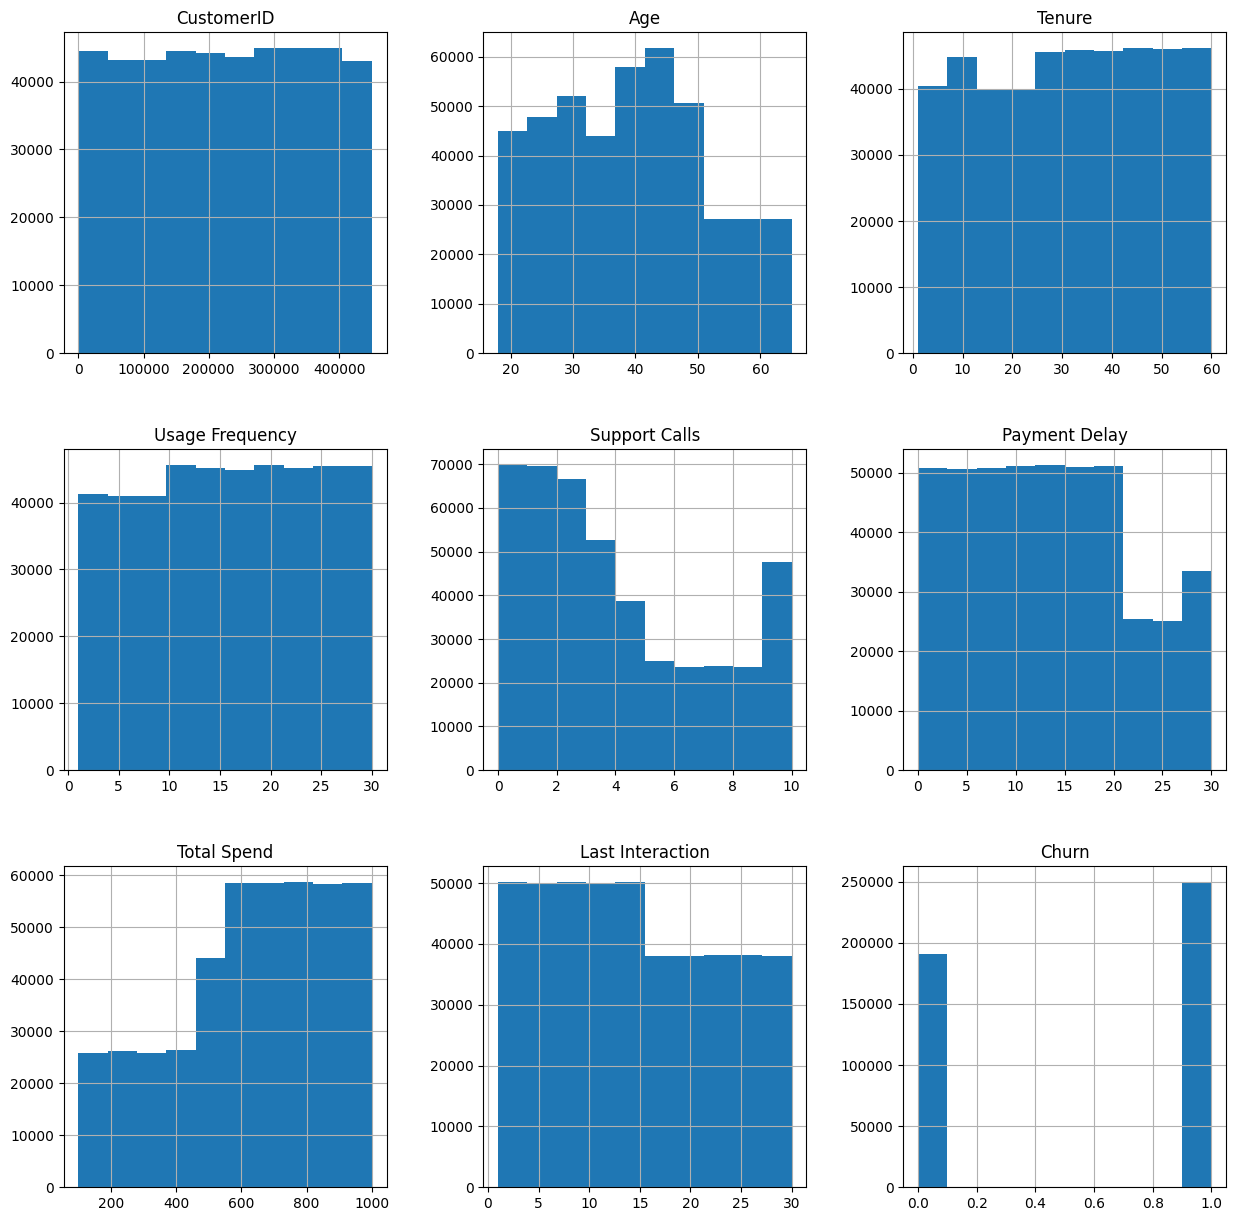

In [ ]:

train_df.hist(figsize=(15,15))
plt.show()

These are the bar plots for all the numeric columns in the dataset.

In [ ]:
train_df['Churn'].value_counts()

,count
Churn,
1.0,249999
0.0,190833


In [ ]:
classes=train_df['Churn'].value_counts()

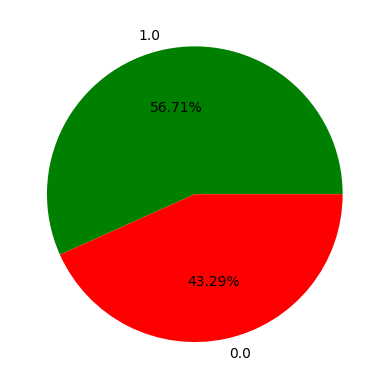

In [ ]:
plt.pie(classes.values,labels=classes.index,colors=['green','red'],autopct='%1.2f%%')
plt.show()

So, classes are not so much imbalanced . We are not going to apply any class balancing technique

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [ ]:
train_df.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


There is a single row which is containing null in every columns . We can drop it and it will not effect our model performance

In [ ]:
train_df.dropna(inplace=True)

In [ ]:
train_df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


Let us see how subscription type is distributed in the dataset

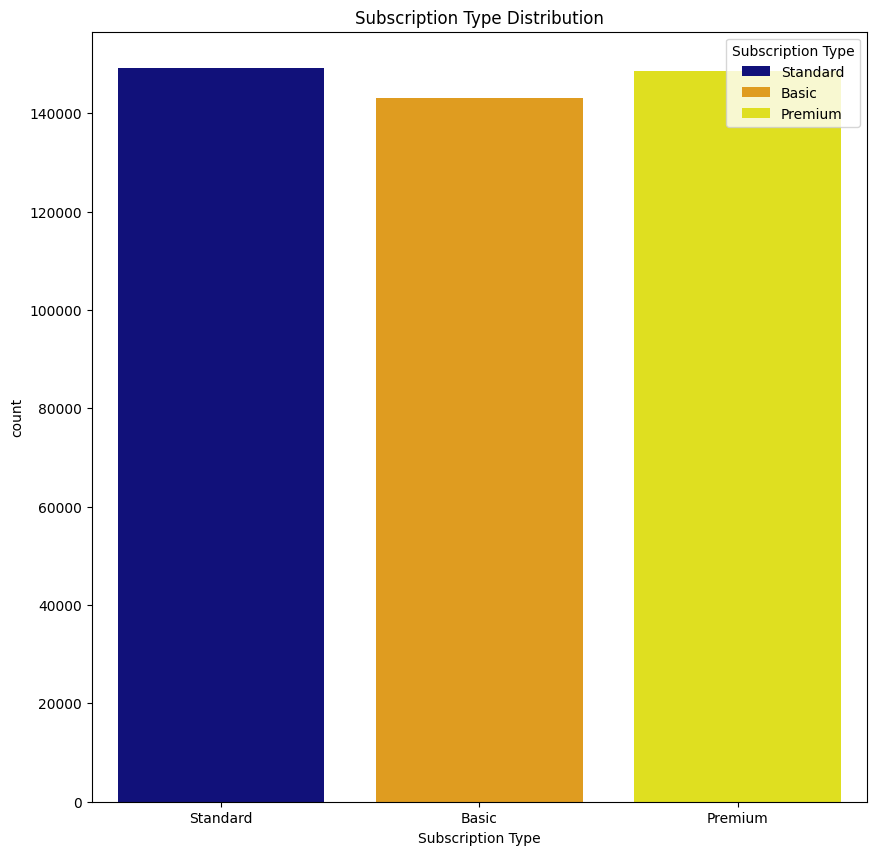

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='Subscription Type',hue='Subscription Type', data=train_df, palette=['darkblue', 'orange', 'yellow'],legend=True)
plt.title('Subscription Type Distribution')
plt.show()

Now we will encode categorical columns by applying labelencoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
columns_to_encode=['Gender' , 'Subscription Type' , 'Contract Length']

le=LabelEncoder()

for col in columns_to_encode:
  train_df[col]=le.fit_transform(train_df[col])

In [ ]:
for col in columns_to_encode:
  test_df[col]=le.fit_transform(test_df[col])

In [ ]:
train_df=train_df.drop(['CustomerID'],axis=1)

In [ ]:
test_df=test_df.drop(['CustomerID'],axis=1)

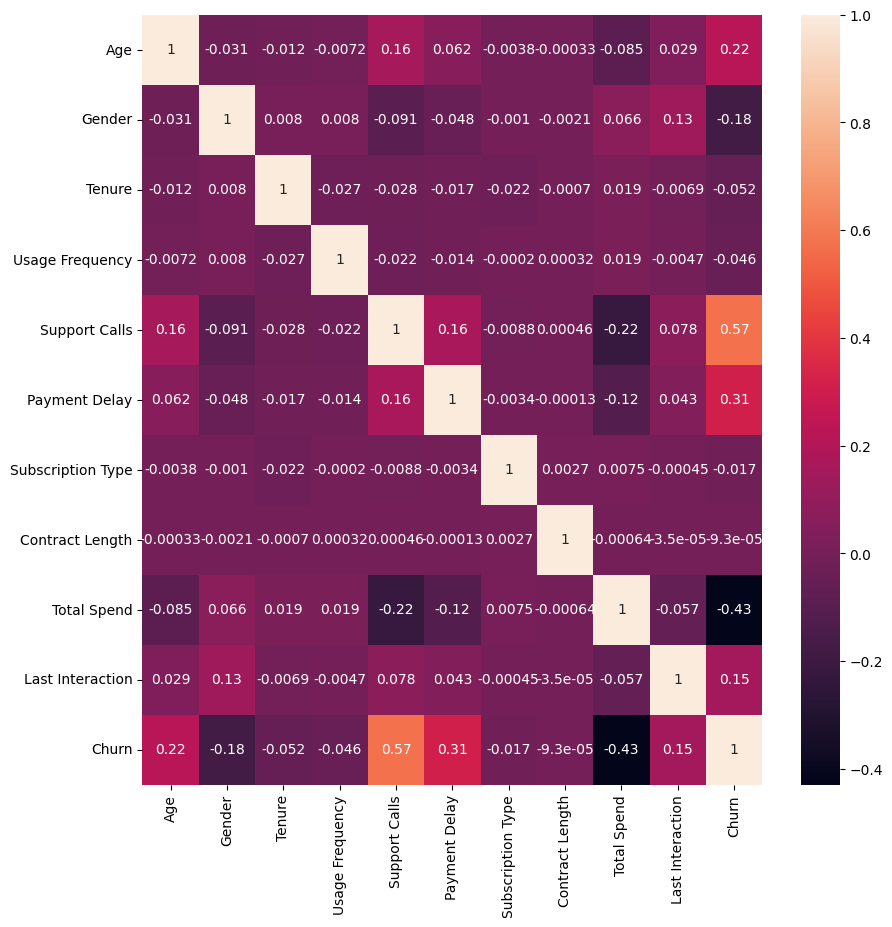

In [ ]:
corr=train_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

From the correlation matrix , we can see that the features like : 'Subscription Type' , 'Contact Length' does not bear bare minimum or no significance while determining churm of a customer . So , we can drop these .

In [ ]:
train_df=train_df.drop(['Subscription Type' , 'Contract Length'] , axis=1)
test_df=test_df.drop(['Subscription Type' , 'Contract Length'] , axis=1)

Let us see how churm is changing with respect to last interection

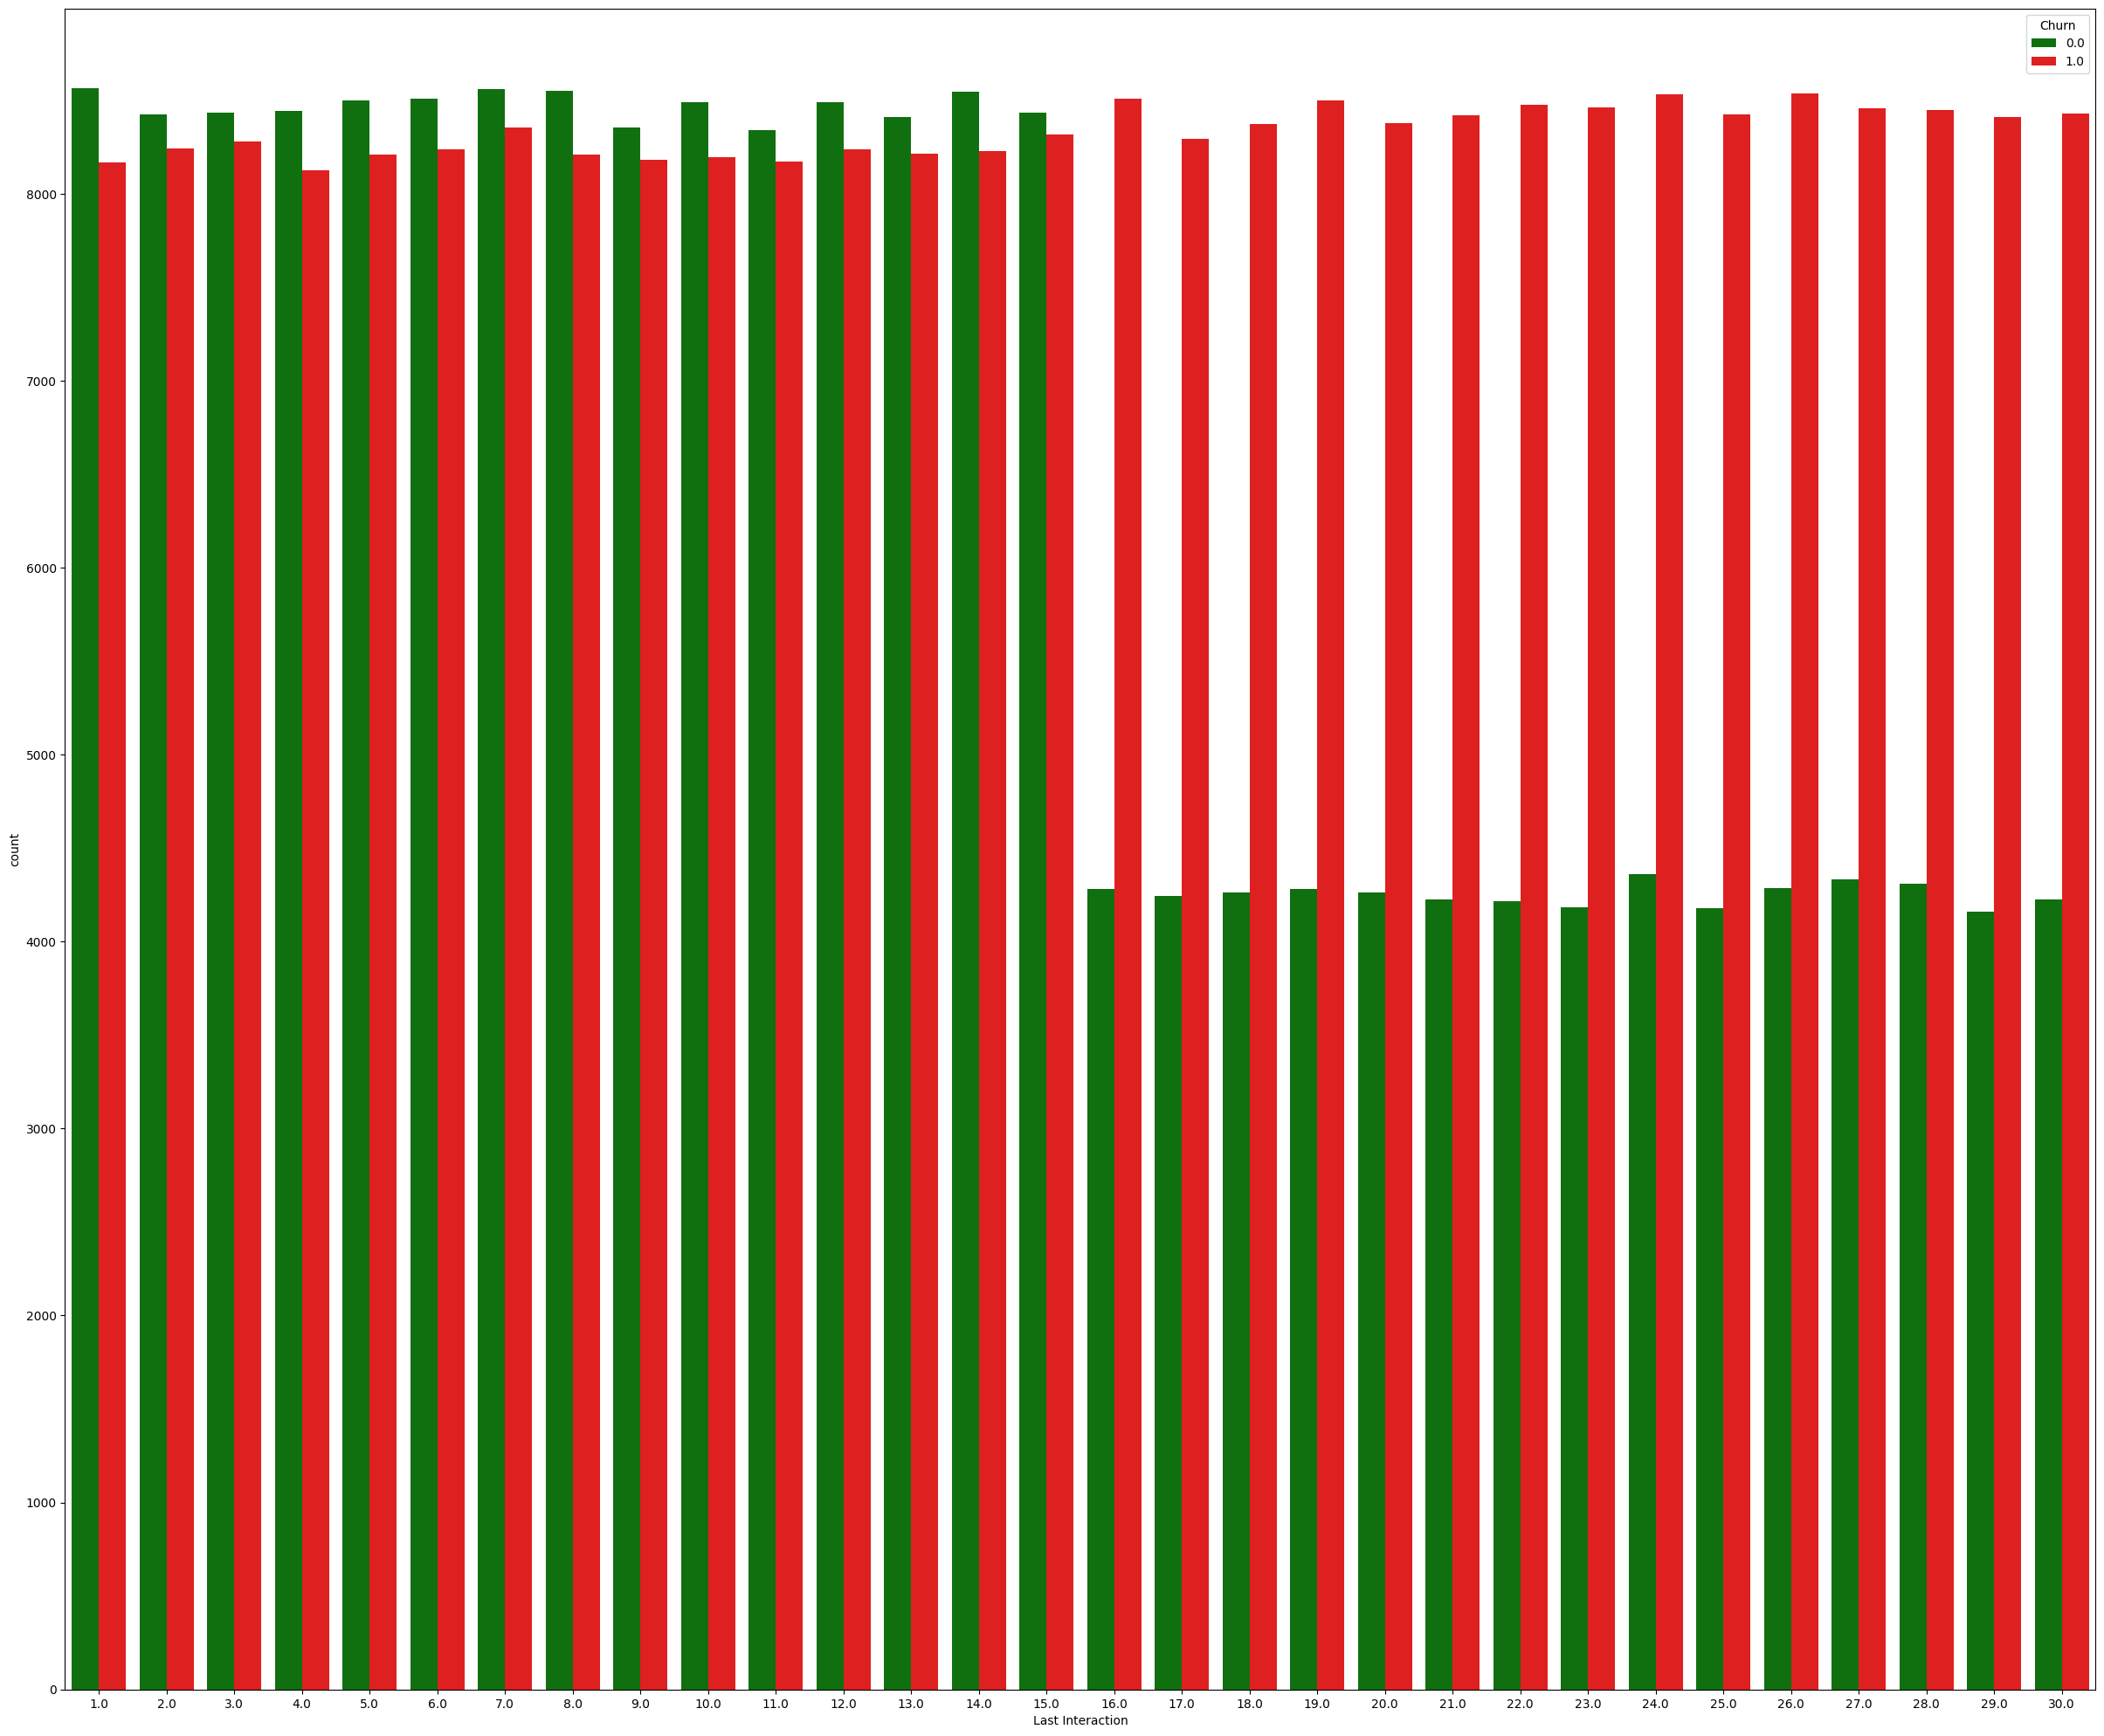

In [ ]:
plt.figure(figsize=(30,25))
sns.countplot(x='Last Interaction', hue='Churn', data=train_df, palette=['green','red'])


plt.show()

So , as one can guess , if interaction decreases , users tend to withdraw their subscription in most of the cases

Can payment delay be a sign of withdrawal of their subscription for the service ?

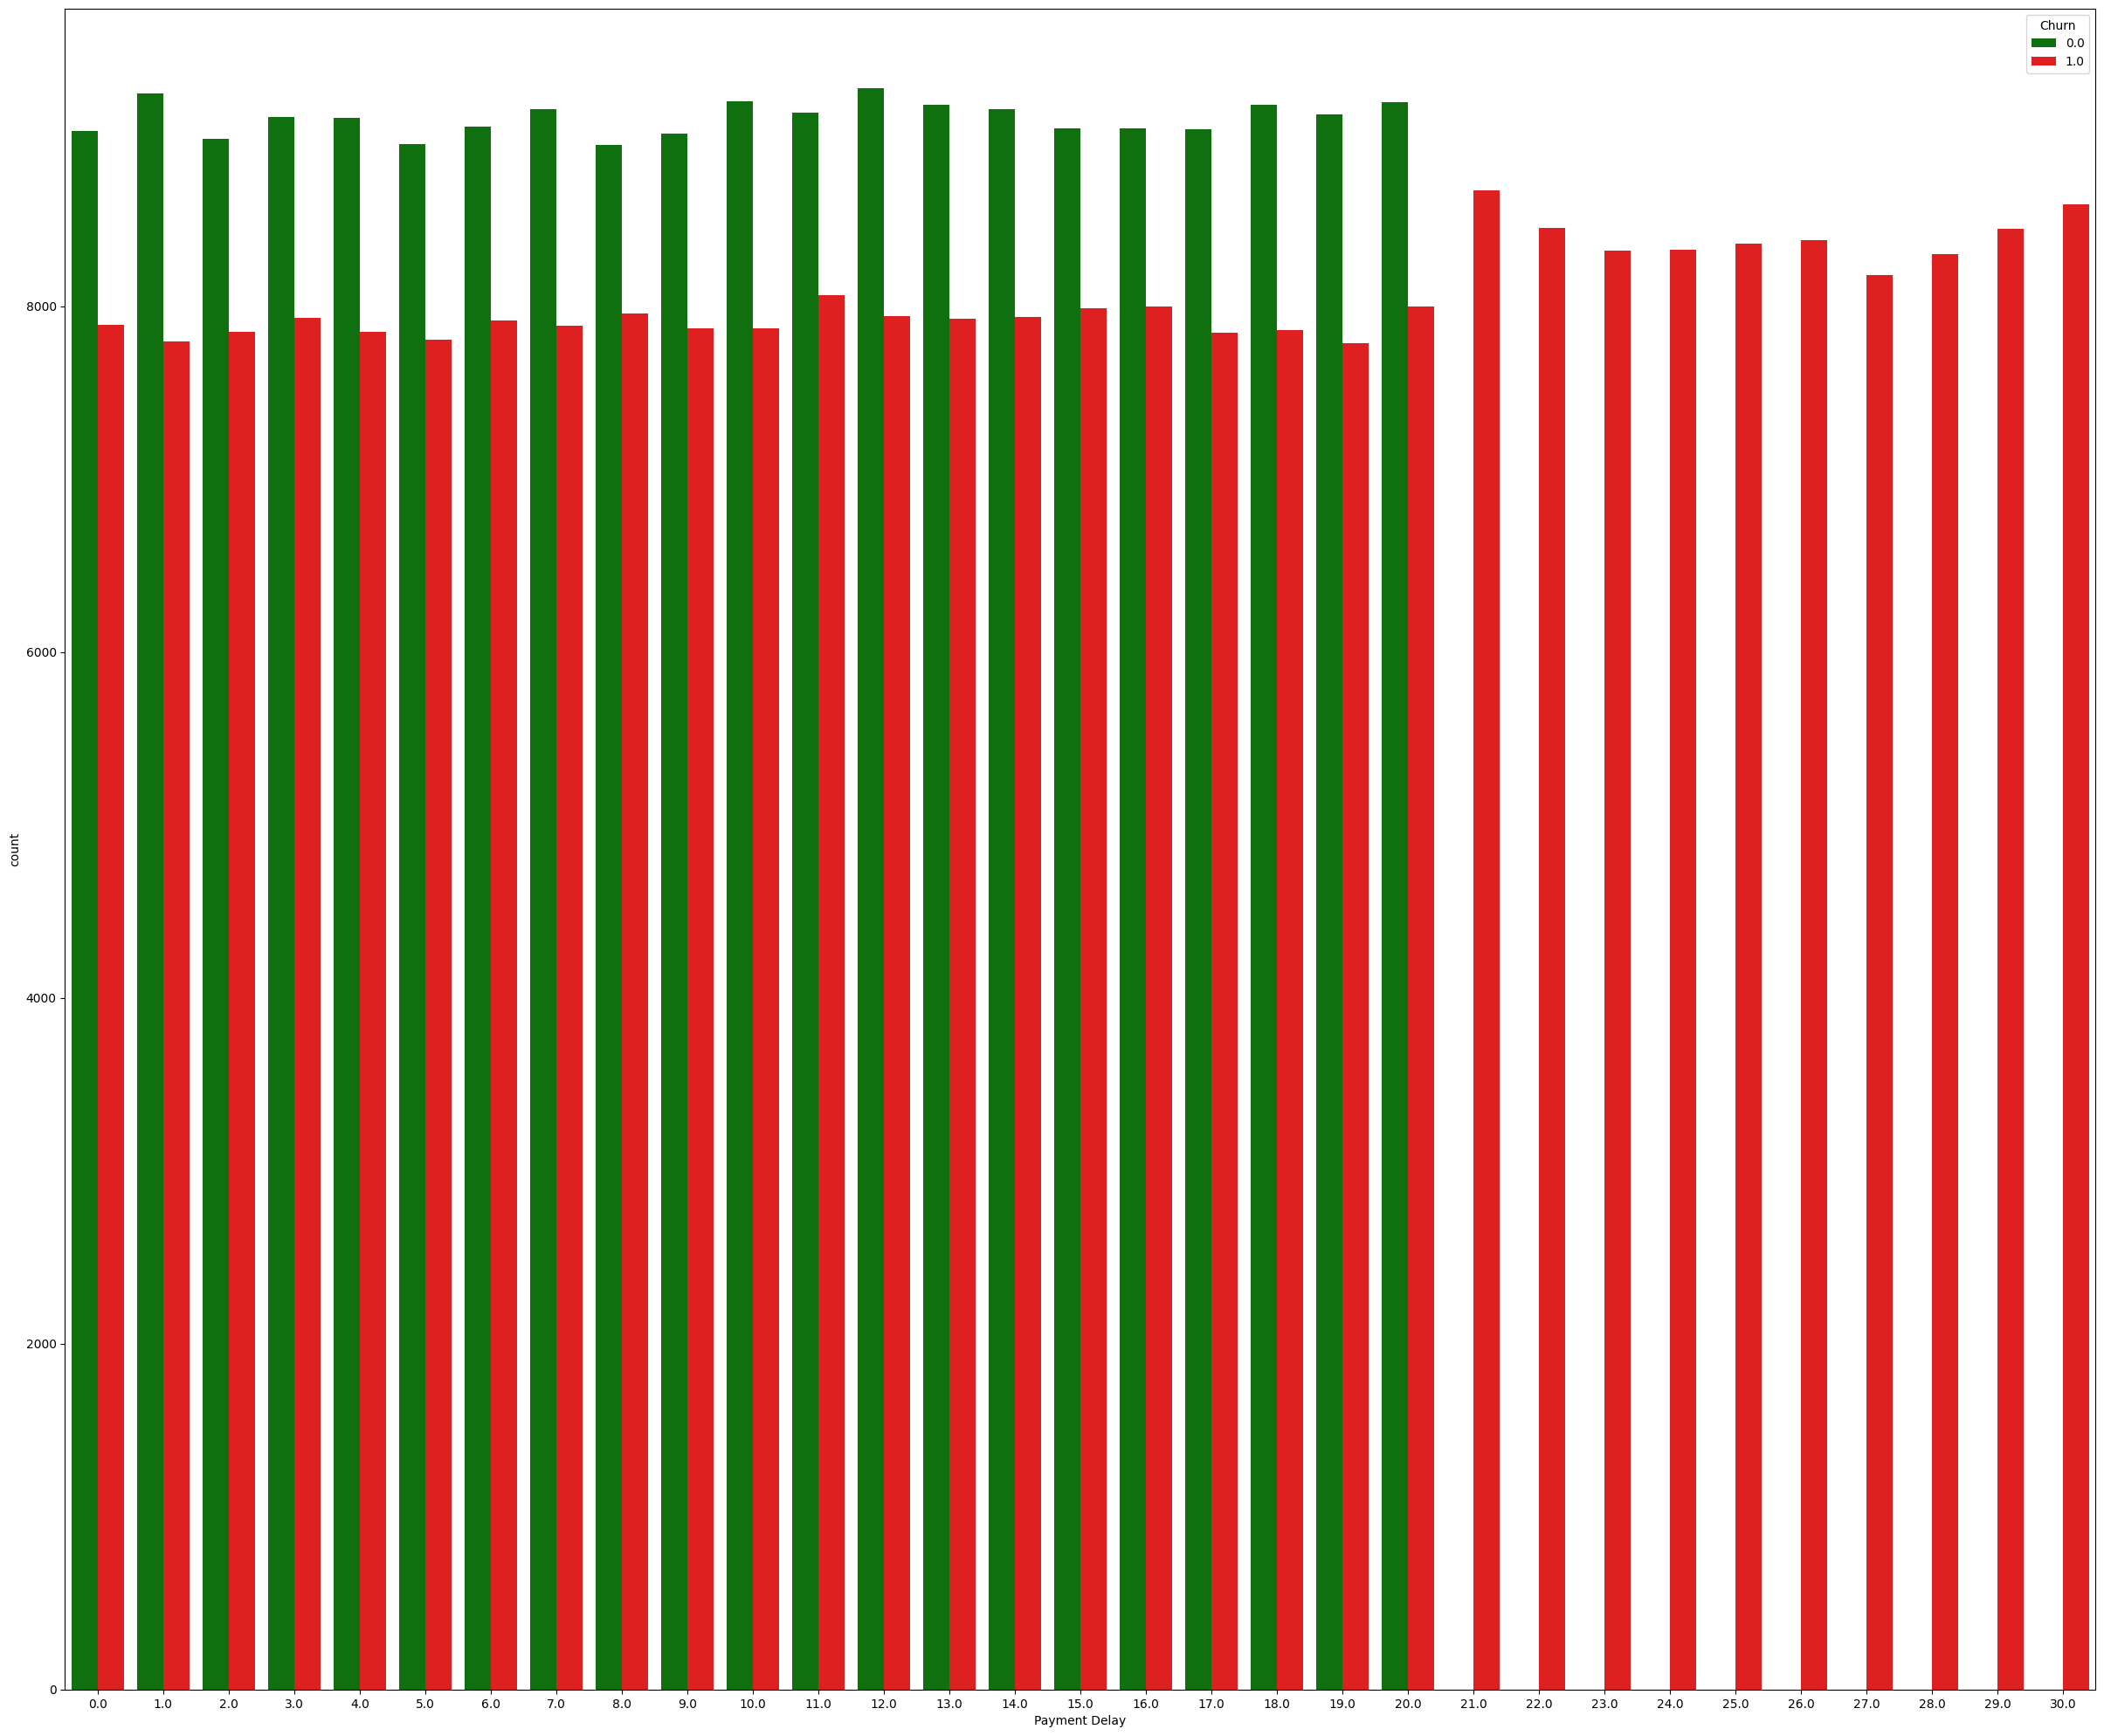

In [ ]:
plt.figure(figsize=(30,25))
sns.countplot(x='Payment Delay', hue='Churn', data=train_df, palette=['green','red'])
plt.show()

So , we can see payment date does not go further from 20th of a month if a person wants to continue with the service

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_df.drop('Churn', axis=1), train_df['Churn'], test_size=0.2, random_state=42)
# x_train=train_df.drop(['Churn'] , axis=1)
# y_train=train_df['Churn']
# x_test=test_df.drop(['Churn'] , axis=1)
# y_test=test_df['Churn']

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression(max_iter=2000)

lr.fit(x_train , y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [ ]:
acc=accuracy_score(y_test , y_pred)
print('Accuracy : ' , acc)
lr_acc=acc
report=classification_report(y_test , y_pred)
print('Classification Report : ' , report)



Accuracy :  0.8501139882268877
Classification Report :                precision    recall  f1-score   support

         0.0       0.81      0.85      0.83     38063
         1.0       0.88      0.85      0.87     50104

    accuracy                           0.85     88167
   macro avg       0.85      0.85      0.85     88167
weighted avg       0.85      0.85      0.85     88167



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dr=DecisionTreeClassifier()

dr.fit(x_train , y_train)


DecisionTreeClassifier()

In [ ]:


y_pred=dr.predict(x_test)

acc=accuracy_score(y_test , y_pred)
dr_acc=acc
print('Accuracy : ' , acc)



Accuracy :  0.9690587181144873


In [ ]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     38063
         1.0       0.97      0.98      0.97     50104

    accuracy                           0.97     88167
   macro avg       0.97      0.97      0.97     88167
weighted avg       0.97      0.97      0.97     88167



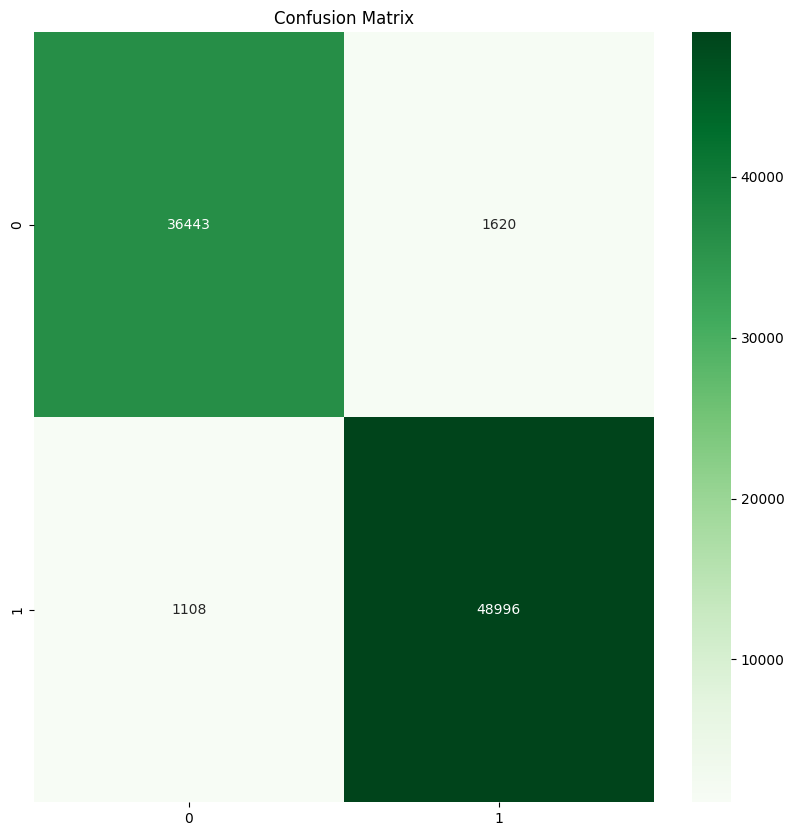

In [ ]:
cm=confusion_matrix(y_test , y_pred)
plt.figure(figsize=(10,10))
plt.title('Confusion Matrix')
sns.heatmap(cm , annot=True,fmt='g',cmap='Greens')
plt.show()

### XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg=XGBClassifier()

xg.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred=xg.predict(x_test)

In [ ]:
acc=accuracy_score(y_test , y_pred)
xg_acc=acc
print('Accuracy : ' , acc)

Accuracy :  0.986536912903921


In [ ]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     38063
         1.0       1.00      0.98      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.98      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



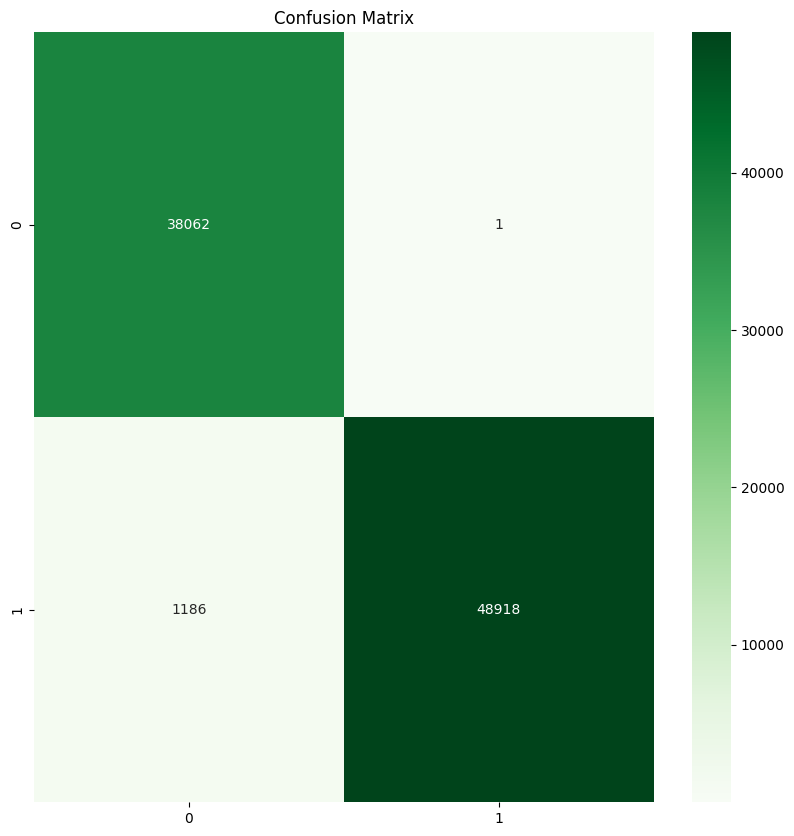

In [ ]:
cm=confusion_matrix(y_test , y_pred)
plt.figure(figsize=(10,10))
plt.title('Confusion Matrix')
sns.heatmap(cm , annot=True,fmt='g',cmap='Greens')
plt.show()

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

rf.fit(x_train , y_train)

RandomForestClassifier()

In [ ]:

y_pred=rf.predict(x_test)

In [ ]:
acc=accuracy_score(y_test , y_pred)
rf_acc=acc
print('Accuracy : ' , acc)


Accuracy :  0.9866616761373302


In [ ]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     38063
         1.0       1.00      0.98      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



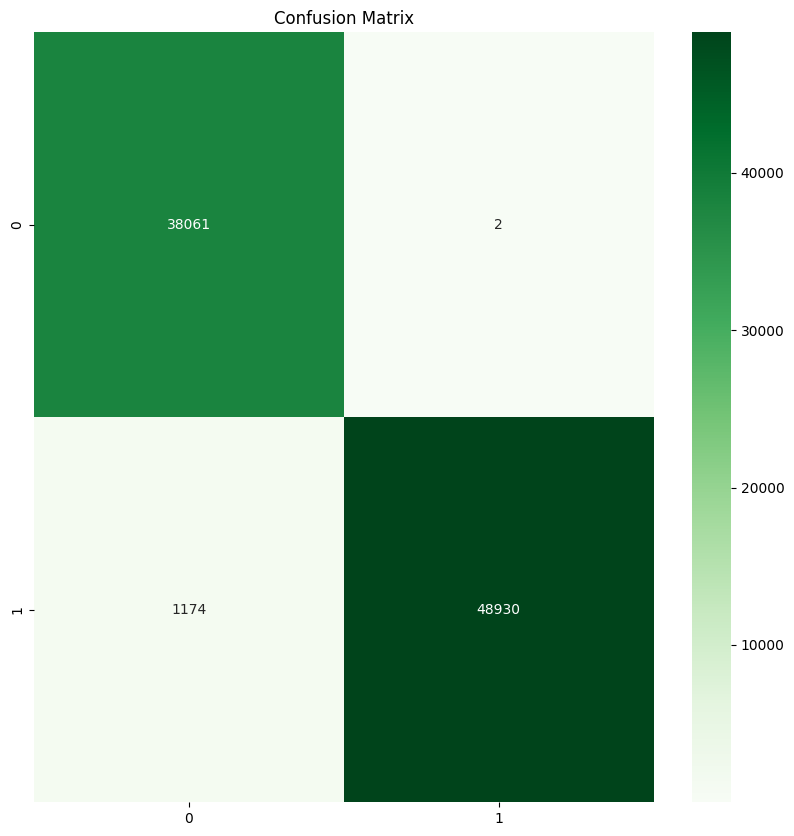

In [ ]:
cm=confusion_matrix(y_test , y_pred)
plt.figure(figsize=(10,10))
plt.title('Confusion Matrix')
sns.heatmap(cm , annot=True,fmt='g',cmap='Greens')
plt.show()

In [ ]:
models=['Logistic Regression' , 'Decision Tree' , 'XGBoost' , 'Random Forest']
accuracy=[lr_acc*100 , dr_acc *100 , xg_acc *100, rf_acc *100]

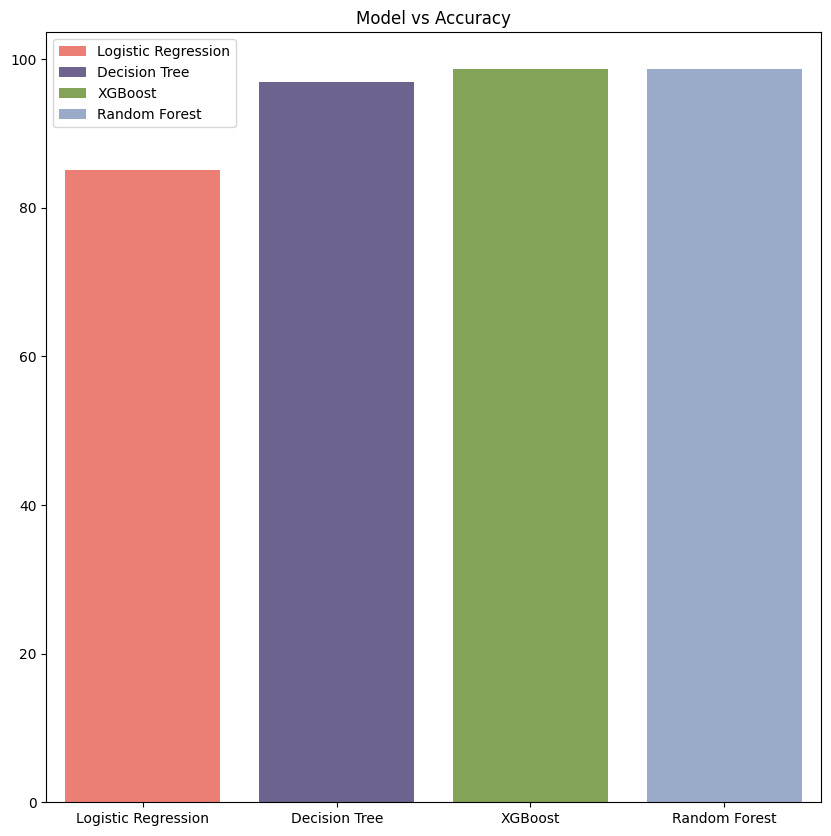

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Model vs Accuracy')
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#92A8D1']
sns.barplot(x=models , y=accuracy,hue=models, palette=colors,legend=True)
plt.show()

### Let us validate one of the models with test data ( Random Forest )

In [ ]:
x_val=test_df.drop(['Churn'] , axis=1)
y_val=test_df['Churn']

In [ ]:
rf.fit(x_val , y_val)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_val)

In [ ]:
acc=accuracy_score(y_val , y_pred)
print('Accuracy : ' , acc)


Accuracy :  1.0


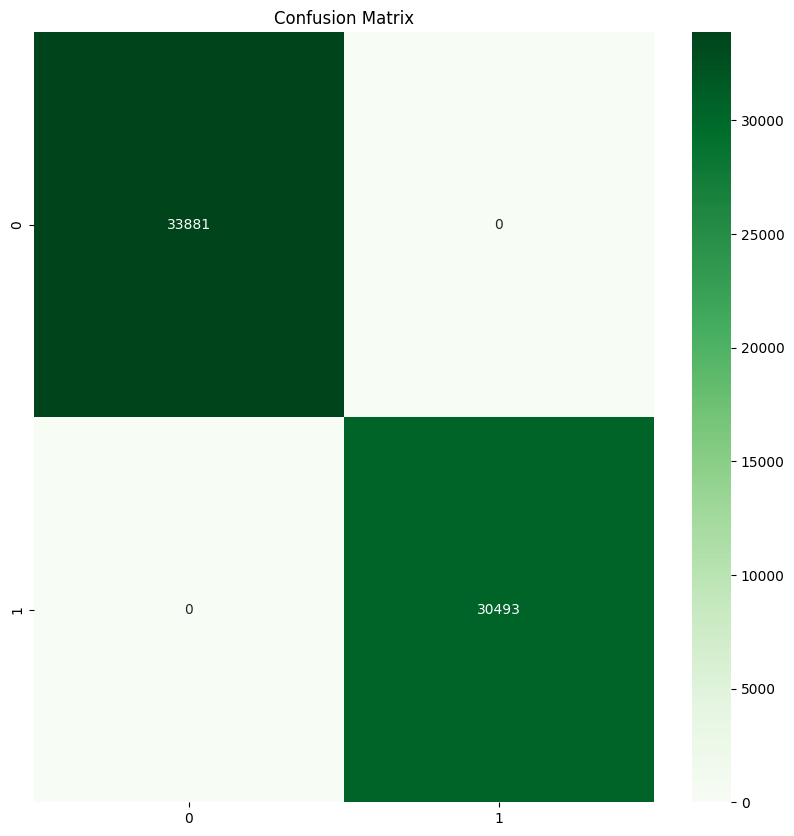

In [ ]:
cm=confusion_matrix(y_val , y_pred)
plt.figure(figsize=(10,10))
plt.title('Confusion Matrix')
sns.heatmap(cm , annot=True,fmt='g',cmap='Greens')
plt.show()

Here we can see our model is performing very good with the validation set and as well as with the test dataset . But the result was no this level of good when train dataset was huge and not splitted into training and validation while using the test dataset for validation .
Back then, training dataset had more than 0.4 million data .Then splitted it into a ratio of 80% and 20% . That resulted a well-trained model.